# LOGISTIC REGRESSION

Logistic Regression adalah teknik machine learning yang paling umum digunakan dalam binary classification. Sesuai namanya, teknik ini menggunakan regresi sebagai dasar untuk menentukan keluarannya. Keluaran yang dihasilkan oleh Logistic Regression ini adalah nilai probability. Prinsipnya sama seperti regresi linear, akan tetapi fungsinya diaktivasi menggunakan logit function.

Fungsinya hampir sama seperti regresi linear, akan tetapi dalam y axis atau prediksinya ditentukan dalam persamaan odds dibawah ini.

Berikut adalah persamaan log odds.

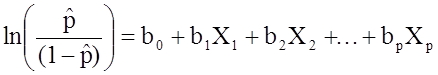

dari persamaan diatas, kita jabarkan sehingga akan ditentukan nilai p

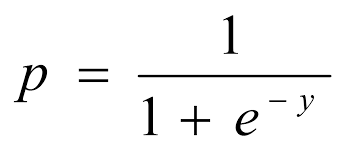

Perbedaan regresi linear dan Logistic Regression

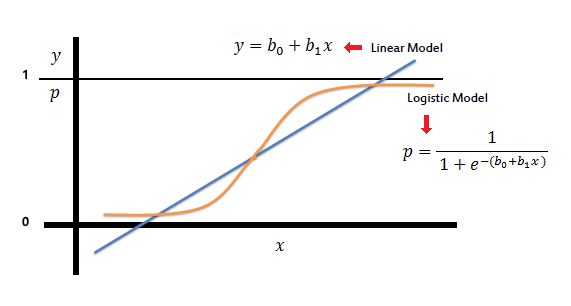

Dalam menentukan klasifikasi, pada umumnya ditentukan dengan nilai p sebesar 0.5. Namun bisa diubah jika kita mempunyai domain knowledge terhadap use case yang kita hadapi.

# CODING SECTION
 
# Use Case

Sebuah perusahaan mobil berinisial AVZ ingin mendongkrak penjualan mereka untuk tahun 2019. Sebagai Data Scientist, kita diberikan dataset laporan hasil iklan mobil yang berisi dengan fitur ID, umur, gaji, dan record pembelian. Diharapkan kita mampu memberikan insight untuk meningkatkan kemungkinan customer akan membeli mobil tersebut atau tidak.

# Modelling

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
df = pd.read_csv('data_iklan.csv')

In [3]:
df.head(10)

,ID,Gender,Umur,Gaji,Pembelian
0,15624510,Pria,19,9,0
1,15810944,Pria,35,10,0
2,15668575,Wanita,26,21,0
3,15603246,Wanita,27,28,0
4,15804002,Pria,19,38,0
5,15728773,Pria,27,29,0
6,15598044,Wanita,27,42,0
7,15694829,Wanita,32,75,1
8,15600575,Pria,25,16,0
9,15727311,Wanita,35,32,0


In [4]:
# memisahkan dataset ke training dan test data
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [7]:
#cek probabilitas dari hasil modelling
classifier.predict_proba(X_test)


array([[0.88489246, 0.11510754],
       [0.82606004, 0.17393996],
       [0.80268009, 0.19731991],
       [0.90847665, 0.09152335],
       [0.89750982, 0.10249018],
       [0.99150713, 0.00849287],
       [0.984262  , 0.015738  ],
       [0.26170525, 0.73829475],
       [0.9937085 , 0.0062915 ],
       [0.49445864, 0.50554136],
       [0.96280169, 0.03719831],
       [0.9698172 , 0.0301828 ],
       [0.83673545, 0.16326455],
       [0.62793535, 0.37206465],
       [0.98336163, 0.01663837],
       [0.66223211, 0.33776789],
       [0.71733952, 0.28266048],
       [0.98722144, 0.01277856],
       [0.01137123, 0.98862877],
       [0.95539897, 0.04460103],
       [0.90868181, 0.09131819],
       [0.03623728, 0.96376272],
       [0.72032162, 0.27967838],
       [0.11890106, 0.88109894],
       [0.99513247, 0.00486753],
       [0.02762818, 0.97237182],
       [0.92038082, 0.07961918],
       [0.91947593, 0.08052407],
       [0.79875968, 0.20124032],
       [0.83639775, 0.16360225],
       [0.

In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [9]:
accuracy_score(y_test, y_pred)

0.89

# Visualisasi

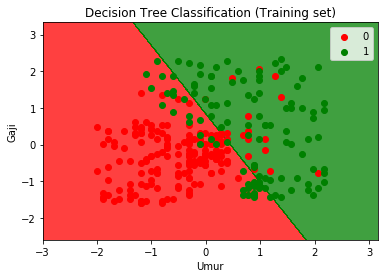

In [10]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Umur')
plt.ylabel('Gaji')
plt.legend()
plt.show()

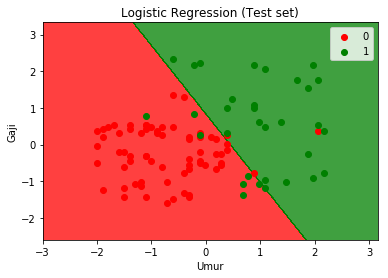

In [11]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Umur')
plt.ylabel('Gaji')
plt.legend()
plt.show()

# KESIMPULAN

Logistic Regression  mudah dipahami dan diinterpretasikan karena hasil klasifikasinya ditentukan berdasarkan probabilitas. Namun, seperti halnya regresi linear, logistic regression hanya efektif digunakan dalam linear problem. Artinya, model ini pada umumnya hanya ampuh jika korelasi antara fitur dan target cukup besar. Pada chapter berikutnya, akan dibahas modelling dengan pemecahan masalah non-linear problem.